# Required Packages

In [31]:
%pip install matplotlib
%pip install geopandas
%pip install pyproj
%pip install fiona
%pip install rioxarray
%pip install rasterio
%pip install tabulate
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# File Path Configuration

In [32]:
import os
import geopandas as gpd

# File paths
gpkg_boundary_path = os.path.join("Explanatory Factors", "FINAL_Reprojected_Complete_BrgyBnd.gpkg")
gpkg_points_path = os.path.join("Explanatory Factors", "polangui_flood_sample_points.gpkg")
excel_flood_data_file = os.path.join("Explanatory Factors", 'Flood_evacuees.xlsx')

# Verify file existence
file_check_status = {}

if not os.path.exists(gpkg_boundary_path):
    file_check_status['Boundary'] = f"X MISSING: {gpkg_boundary_path}"
else:
    file_check_status['Boundary'] = f"/ FOUND: {gpkg_boundary_path}"

if not os.path.exists(gpkg_points_path):
    file_check_status['Points'] = f"! NOT FOUND: {gpkg_points_path} (Will be generated later)"
else:
    file_check_status['Points'] = f"/ FOUND: {gpkg_points_path}"

if not os.path.exists(excel_flood_data_file):
    file_check_status['Flood Data'] = f"X MISSING: {excel_flood_data_file}"
else:
    file_check_status['Flood Data'] = f"/ FOUND: {excel_flood_data_file}"

print(" File Status Summary (VS Code / Colab Check) ")
for status in file_check_status.values():
    print(status)
print("-" * 50)


 File Status Summary (VS Code / Colab Check) 
/ FOUND: Explanatory Factors\FINAL_Reprojected_Complete_BrgyBnd.gpkg
/ FOUND: Explanatory Factors\polangui_flood_sample_points.gpkg
/ FOUND: Explanatory Factors\Flood_evacuees.xlsx
--------------------------------------------------


In [33]:
import geopandas as gpd

gpkg_file_path = gpkg_boundary_path 
target_crs_code = 'ESRI:102457'  # PRS_1992_UTM_Zone_51N

layer_to_use = 'final_reprojected_complete_brgybnd__reprojected__brgy_bnd_z__brgybnd_polangui_100418_region'

print(f"Loading layer: {layer_to_use}")

try:
    gdf = gpd.read_file(gpkg_file_path, layer=layer_to_use)

    # Tag with correct CRS if needed
    if gdf.crs is None or gdf.crs.to_string() != target_crs_code:
        gdf = gdf.set_crs(target_crs_code, allow_override=True)
        print(f"/ CRS successfully tagged as {target_crs_code} ({gdf.crs.name}).")

    print(f"Total features loaded: {len(gdf)}")
    print(f"\nX An error occurred during CRS setup or file reading: {e}")
except Exception as e:
    print(f"\nX An error occurred during CRS setup or file reading: {e}")

Loading layer: final_reprojected_complete_brgybnd__reprojected__brgy_bnd_z__brgybnd_polangui_100418_region
Total features loaded: 44

X An error occurred during CRS setup or file reading: name 'e' is not defined


1. DATA OVERVIEW
Total Number of Barangays (Features): 44
CRS (Coordinate Reference System): ESRI:102457
Geometry Type: ['MultiPolygon']

First 5 Rows (Features and Attributes):
                 TAG     Area_Ha  \
0             Ubaliw  221.489858   
1             Sugcad  395.024484   
2        Kinuartelan  342.028382   
3  Centro Occidental  192.990868   
4              Gamot  347.497815   

                                            geometry  
0  MULTIPOLYGON (((551115.362 1468968.78, 551183....  
1  MULTIPOLYGON (((552632.491 1473071.149, 552654...  
2  MULTIPOLYGON (((550988.144 1474387.521, 551017...  
3  MULTIPOLYGON (((550817.805 1469724.902, 550838...  
4  MULTIPOLYGON (((552632.491 1473071.149, 552739...  

2. LIST OF ALL BARANGAYS
Unique Barangay Names (44):
Agos                Alnay               Alomon              Amogues             Anopol              
Apad                Balaba              Balangibang         Balinad             Basud               
Buyo               

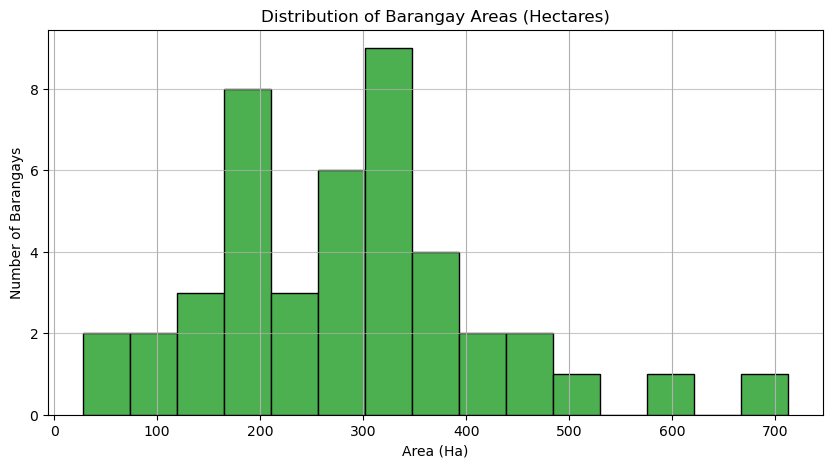

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    if 'gdf' not in locals():
        print("X Error: 'gdf' (GeoDataFrame) not found. Please run the data loading and CRS setup cell first.")
        raise NameError
except NameError:
    # Exit or handle the error gracefully
    pass

# --- 1. Basic Information and Feature Check 
print("=" * 50)
print("1. DATA OVERVIEW")
print("=" * 50)
print(f"Total Number of Barangays (Features): {len(gdf)}")
print(f"CRS (Coordinate Reference System): {gdf.crs.to_string()}")
print(f"Geometry Type: {gdf.geom_type.unique()}")
print("\nFirst 5 Rows (Features and Attributes):")
print(gdf.head())

# --- 2. List All Barangays (Feature Names) ---
print("\n" + "=" * 50)
print("2. LIST OF ALL BARANGAYS")
print("=" * 50)
# Get the unique names from the 'TAG' column
all_barangays = gdf['TAG'].sort_values().tolist()
print(f"Unique Barangay Names ({len(all_barangays)}):")
# Print names neatly (e.g., 5 per line)
for i, name in enumerate(all_barangays):
    print(f"{name:<20}", end='\n' if (i + 1) % 5 == 0 else '')
print("\n")

# --- 3. Area Statistics (Using the Area_Ha column) ---
print("\n" + "=" * 50)
print("3. AREA STATISTICS (in Hectares)")
print("=" * 50)
# Convert the 'Area_Ha' column to a Pandas Series for statistical summary
area_summary = gdf['Area_Ha'].astype(float).describe()
print(area_summary)
print(f"\nBarangay with MAX Area: {gdf.loc[gdf['Area_Ha'].idxmax(), 'TAG']} ({area_summary['max']:.2f} Ha)")
print(f"Barangay with MIN Area: {gdf.loc[gdf['Area_Ha'].idxmin(), 'TAG']} ({area_summary['min']:.2f} Ha)")

# --- 4. Geometry Validity Check ---
print("\n" + "=" * 50)
print("4. GEOMETRY VALIDITY CHECK")
print("=" * 50)
# Check for invalid or empty geometries (polygons that are broken or null)
invalid_geometries = gdf[~gdf.is_valid]
empty_geometries = gdf[gdf.is_empty]
print(f"Number of Invalid Geometries: {len(invalid_geometries)}")
print(f"Number of Empty Geometries: {len(empty_geometries)}")
if not invalid_geometries.empty:
    print("! Invalid geometries found. Consider fixing with gdf.geometry.buffer(0) if issues arise.")

# --- 5. Visualization of Area Distribution ---
print("\n" + "=" * 50)
print("5. AREA DISTRIBUTION PLOT")
print("=" * 50)
plt.figure(figsize=(10, 5))
gdf['Area_Ha'].astype(float).hist(bins=15, edgecolor='black', color='#4CAF50')
plt.title('Distribution of Barangay Areas (Hectares)')
plt.xlabel('Area (Ha)')
plt.ylabel('Number of Barangays')
plt.grid(axis='y', alpha=0.7)
plt.show()

Cleared 'points_gdf' from memory to force file/disk check.
/ Barangay boundaries confirmed loaded. Total features: 44. CRS: ESRI:102457
Checking disk... File 'Explanatory Factors\polangui_flood_sample_points.gpkg' found.
/ Loaded 2200 points from the saved GeoPackage.
! Points file not found or loaded points are invalid. Generating new 50 points per barangay with 10m minimum distance...
/ Points successfully generated and saved to Explanatory Factors\polangui_flood_sample_points.gpkg. Total points: 2200


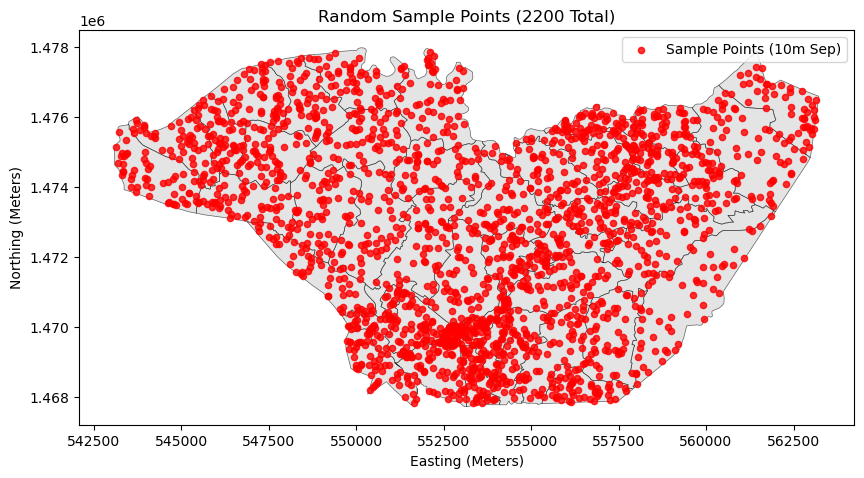

In [35]:
import geopandas as gpd
import random
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
import fiona
import numpy as np
import pandas as pd


# Configuration
gpkg_file_path = gpkg_boundary_path
target_crs_code = 'ESRI:102457'
layer_to_use = 'final_reprojected_complete_brgybnd__reprojected__brgy_bnd_z__brgybnd_polangui_100418_region'
points_per_barangay = 50
barangay_name_column = 'TAG'
output_path = gpkg_points_path

# Sampling parameters
MIN_SEPARATION_DISTANCE = 10  # Meters
POINT_RADIUS_M = 5.0
MAX_ATTEMPTS_PER_POINT = 1000

if 'points_gdf' in locals():
    del points_gdf
    print("Cleared 'points_gdf' from memory to force file/disk check.")

try:
    if 'gdf' not in locals():
        print("! 'gdf' not found. Loading boundaries again...")
        gdf = gpd.read_file(gpkg_file_path, layer=layer_to_use)
        if gdf.crs is None or gdf.crs.to_string() != target_crs_code:
            gdf = gdf.set_crs(target_crs_code, allow_override=True)
    
    print(f"/ Barangay boundaries confirmed loaded. Total features: {len(gdf)}. CRS: {gdf.crs.to_string()}")
except Exception as e:
    print(f"X Failed to load Barangay boundaries: {e}. Path used: {gpkg_file_path}")
    raise


# Point generation/loading

if os.path.exists(output_path):
    print(f"Checking disk... File '{output_path}' found.")
    try:
        # Load existing points using the correct path variable
        points_gdf = gpd.read_file(output_path)
        print(f"/ Loaded {len(points_gdf)} points from the saved GeoPackage.")
    except Exception as e:
        print(f"X Error reading saved GeoPackage: {e}. Proceeding to regeneration.")
        points_gdf = gpd.GeoDataFrame()

# Check 2 (Default): Generate new points (runs if file doesn't exist OR failed to load)
# Generate new points if needed
    print(f"! Points file not found or loaded points are invalid. Generating new {points_per_barangay} points per barangay with {MIN_SEPARATION_DISTANCE}m minimum distance...")

    all_points = []

    for index, row in gdf.iterrows():
        barangay_polygon = row['geometry']
        barangay_name = row[barangay_name_column]
        minx, miny, maxx, maxy = barangay_polygon.bounds

        points_added = 0
        attempts = 0
        max_attempts = points_per_barangay * MAX_ATTEMPTS_PER_POINT

        barangay_points_list = []

        while points_added < points_per_barangay and attempts < max_attempts:
            random_x = random.uniform(minx, maxx)
            random_y = random.uniform(miny, maxy)
            random_point = Point(random_x, random_y)

            attempts += 1

            if barangay_polygon.contains(random_point):
                is_too_close = False

                for existing_pt in barangay_points_list:
                    if random_point.distance(existing_pt) < MIN_SEPARATION_DISTANCE:
                        is_too_close = True
                        break

                if not is_too_close:
                    point_data = {
                        'point_id': f"{barangay_name}_{points_added+1}",
                        'barangay_name': barangay_name,
                        'Radius_m': POINT_RADIUS_M,
                        'geometry': random_point
                    }
                    all_points.append(point_data)
                    barangay_points_list.append(random_point)
                    points_added += 1
                    attempts = 0

        if points_added < points_per_barangay:
            print(f"  Warning: Only generated {points_added}/{points_per_barangay} points for {barangay_name} after max attempts.")

    points_gdf = gpd.GeoDataFrame(all_points, crs=gdf.crs)

    if not points_gdf.empty:
        # Final save uses the correct output_path variable
        points_gdf.to_file(output_path, driver='GPKG')
        print(f"/ Points successfully generated and saved to {output_path}. Total points: {len(points_gdf)}")
    else:
        print("X Error: No points were generated. Check polygon validity or bounds.")
        raise Exception("Point generation failed.")


# --- 3. PLOT AND VERIFY ---
# Visualization
try:
    fig, ax = plt.subplots(figsize=(10, 10))

    gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.6)
    # Visualizes the points as markers
    points_gdf.plot(ax=ax, color='red', markersize=20, alpha=0.8, label=f'Sample Points ({MIN_SEPARATION_DISTANCE}m Sep)')

    ax.set_title(f"Random Sample Points ({len(points_gdf)} Total)")
    ax.set_xlabel('Easting (Meters)')
    ax.set_ylabel('Northing (Meters)')
    ax.set_aspect('equal', adjustable='box')
    ax.legend(loc='upper right')

    plt.show()

except Exception as e:
    print(f"X Error during plotting: {e}")

# Flood Evacuee Data Processing

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import ListedColormap, BoundaryNorm 

# Configuration
flood_data_file = excel_flood_data_file 

PARENT_OUTPUT_DIR = "Outputs"
INTERMEDIATE_SUBDIR = "ProcessedTargets"
OUTPUT_DIR = os.path.join(PARENT_OUTPUT_DIR, INTERMEDIATE_SUBDIR)

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR) 

target_output_filename = 'Barangay_Yearly_Recurrence_Target.csv' 
target_output_csv = os.path.join(OUTPUT_DIR, target_output_filename)

TARGET_COLUMN_NAME = 'FLOOD_RECURRENT_BINARY' 
target_output_csv = os.path.join(OUTPUT_DIR, target_output_filename)
# --- Function to clean and analyze a single sheet ---
def process_sheet(df, sheet_name):
    print(f"--- Processing Sheet: {sheet_name} ---")
def process_sheet(df, sheet_name):
    df.columns = df.columns.str.strip()

    families_col = next((col for col in df.columns if 'Families' in col), None)
    individuals_col = next((col for col in df.columns if 'Individuals' in col), None)
    numerical_cols = []
    if families_col:
        numerical_cols.append(families_col)
    if individuals_col:
        numerical_cols.append(individuals_col)

    if 'Barangay' in df.columns:
        # Standardize barangay names
        df['Barangay'] = df['Barangay'].astype(str).str.title().str.strip()
        df['Barangay'] = df['Barangay'].map(lambda x: x.replace('.', '').replace('Stacru', 'Sta Cruz').strip())

    for col in numerical_cols:
        if col and col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)

    if 'Flooded?' in df.columns:
        df['Flooded?'] = pd.to_numeric(df['Flooded?'].astype(str).str.strip().str.lower().replace({'yes': 1, 'no': 0, 'y': 1, 'n': 0}), errors='coerce').fillna(0).astype(int)

    df['Flood_Event_Name'] = sheet_name

    print(f"After cleaning, sheet has {len(df)} rows.")
    print("Missing values summary:")
    print(df.isnull().sum().to_string(header=True, name=False)) 
    print("-" * 30)

    return df

def main_analysis(file_path):
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_path}' was not found. Please ensure it is in the correct directory.")
        return None

    try:
        all_sheets_dict = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')
    except ImportError:
        print("Error: 'openpyxl' library not found. Please install it using: %pip install openpyxl")
        return None
    except Exception as e:
        print(f"An error occurred reading the Excel file: {e}")
        return None

    cleaned_dfs = []
    expected_cols = ['Barangay', 'Total Individuals Evacuated'] 

    for sheet_name, df in all_sheets_dict.items():
        df.columns = df.columns.str.strip()
        families_col_check = next((col for col in df.columns if 'Families' in col), None)

        if all(col in df.columns for col in expected_cols) and families_col_check:
            cleaned_df = process_sheet(df, sheet_name) 
            cleaned_dfs.append(cleaned_df)

    if not cleaned_dfs:
        print("No relevant sheets found for analysis.")
        return

    master_df = pd.concat(cleaned_dfs, ignore_index=True)

    # Yearly recurrence status generation
    if 'Barangay' in master_df.columns and 'Date' in master_df.columns and 'Flooded?' in master_df.columns:
        print("\n--- Generating Detailed YEARLY Recurrence Status (The Target Variable) ---")
        recurrence_check_df = master_df.copy()
        print("\n--- Generating Yearly Recurrence Status ---")
        recurrence_check_df['Year'] = recurrence_check_df['Date'].dt.year

        yearly_event_count = recurrence_check_df.groupby(
            ['Barangay', 'Year']
        )['Flooded?'].sum().reset_index(name='Flood_Event_Count')

        # RECURRENCE CLASSIFICATION: 2+ events = Recurrent (1); 0 or 1 event = Non-Recurrent (0)
        def classify_yearly_status(count):
            return 1 if count >= 2 else 0

        start_year = 2010
        end_year = 2024
        all_unique_years = pd.Series(range(start_year, end_year + 1))

        full_yearly_timeline = pd.MultiIndex.from_product(
            [master_df['Barangay'].unique(),
             all_unique_years],
            names=['Barangay', 'Year']
        ).to_frame(index=False)

        yearly_status_df = pd.merge(
            full_yearly_timeline,
            yearly_event_count,
            on=['Barangay', 'Year'],
            how='left'
        )
        yearly_status_df['Flood_Event_Count'] = yearly_status_df['Flood_Event_Count'].fillna(0).astype(int)

        yearly_status_df['Recurrent_Binary'] = yearly_status_df['Flood_Event_Count'].apply(classify_yearly_status)
        
        final_pivot_df = yearly_status_df.pivot(
            index='Barangay',
            columns='Year',
            values='Recurrent_Binary'
        ).add_prefix('Recurrent_')
        
        print("\n--- ML Target Dataframe (Recurrent_YYYY Columns) ---")
        print("Recurrence status (1=Recurrent [2+ events], 0=Non-Recurrent [0 or 1 event]) for that year.")
        print("-" * 70)
        print(final_pivot_df.head(35).to_string(index=True)) 

        final_pivot_df.to_csv(target_output_csv)
        print(f"\n/ Yearly Recurrence Target saved to: {target_output_csv}")

        return yearly_status_df 
    else:
        print("\nSkipping Detailed Recurrence Status generation: Missing required columns.")
        return None

# Execute analysis
yearly_status_data = main_analysis(flood_data_file)

After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuated     0
Flooded?                        0
Flood_Event_Name                0
------------------------------
After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuated     0
Flooded?                        0
Flood_Event_Name                0
------------------------------
After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuated     0
Flooded?                        0
Flood_Event_Name                0
------------------------------
After cleaning, 

--- Processing Sheet: JUANING_2011-Q3 ---
After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuated     0
Flooded?                        0
Flood_Event_Name                0
------------------------------
--- Processing Sheet: GORIO_2013-Q2 ---
After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuated     0
Flooded?                        0
Flood_Event_Name                0
------------------------------
--- Processing Sheet: YOLANDA_2013-Q4 ---
After cleaning, sheet has 44 rows.
Missing values summary:
Barangay no.                    0
Barangay                        0
Date                            0
No. of Families Evacuated/HH    0
Total Individuals Evacuat

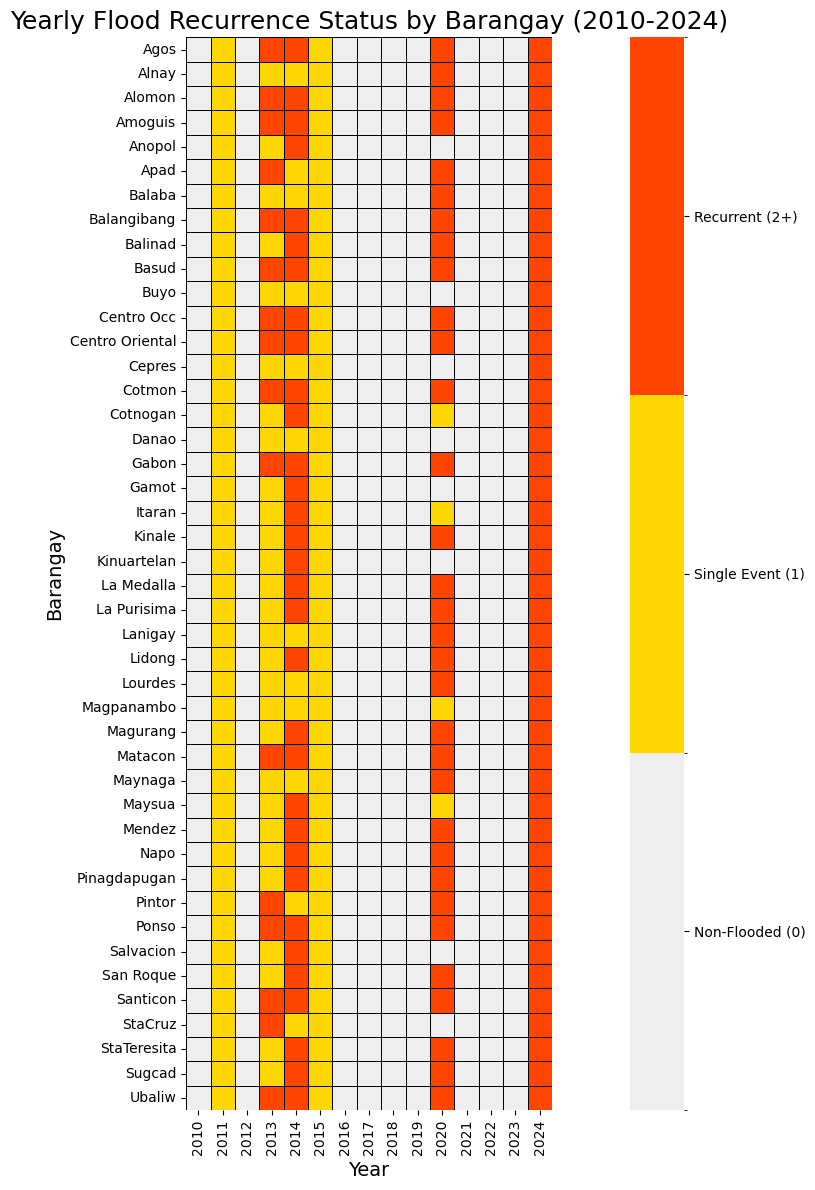


--- Heatmap Data Table (Key for Plot) ---
Year             2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
Barangay                                                                                                 
Agos                0     1     0     2     2     1     0     0     0     0     2     0     0     0     2
Alnay               0     1     0     1     1     1     0     0     0     0     2     0     0     0     2
Alomon              0     1     0     2     2     1     0     0     0     0     2     0     0     0     2
Amoguis             0     1     0     2     2     1     0     0     0     0     2     0     0     0     2
Anopol              0     1     0     1     2     1     0     0     0     0     0     0     0     0     2
Apad                0     1     0     2     1     1     0     0     0     0     2     0     0     0     2
Balaba              0     1     0     1     1     1     0     0     0     0     2     0     0     0     2
Bal

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import os

FLOOD_DATA_FILE = excel_flood_data_file 

# --- Function to clean and analyze a single sheet ---
def process_sheet(df, sheet_name):
    # This is an essential helper function needed by main_analysis_with_return
    print(f"--- Processing Sheet: {sheet_name} ---")
    df.dropna(how='all', inplace=True)
    df.columns = df.columns.str.strip()

    families_col = next((col for col in df.columns if 'Families' in col), None)
    individuals_col = next((col for col in df.columns if 'Individuals' in col), None)
    numerical_cols = []
    if families_col:
        numerical_cols.append(families_col)
    if individuals_col:
        numerical_cols.append(individuals_col)

    if 'Barangay' in df.columns:
        # STANDARDIZATION (Fixes Sta. Cruz)
        df['Barangay'] = df['Barangay'].astype(str).str.title().str.strip()
        df['Barangay'] = df['Barangay'].map(lambda x: x.replace('.', '').replace('Stacru', 'Sta Cruz').strip())


    for col in numerical_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)

    if 'Flooded?' in df.columns:
        df['Flooded?'] = pd.to_numeric(df['Flooded?'].astype(str).str.strip().str.lower().replace({'yes': 1, 'no': 0, 'y': 1, 'n': 0}), errors='coerce').fillna(0).astype(int)

    df['Flood_Event_Name'] = sheet_name

    print(f"After cleaning, sheet has {len(df)} rows.")
    print("Missing values summary:")
    print(df.isnull().sum().to_string(header=True, name=False))
    print("-" * 30)

    return df

# Function to generate and plot the Heatmap ---
def generate_recurrence_heatmap(yearly_status_df):
    """
    Generates a heatmap showing the yearly flood recurrence status for all barangays.
    Uses the full event count (0, 1, 2+) for coloring.
    """

    if yearly_status_df is None or yearly_status_df.empty:
        print("X Error: The yearly_status_df is empty or was not generated. Check main_analysis execution.")
        return

    print("=" * 70)
    print("GENERATING YEARLY FLOOD RECURRENCE HEATMAP")
    print("=" * 70)

    # 1. Prepare the data for pivoting
    # Clip counts > 2 to 2: 0 = Non-Flooded, 1 = Single Event, 2 = Recurrent
    yearly_status_df['Color_Code'] = np.clip(yearly_status_df['Flood_Event_Count'], 0, 2)

    # Pivot to create the heatmap matrix (Barangay x Year)
    heatmap_data = yearly_status_df.pivot(
        index='Barangay',
        columns='Year',
        values='Color_Code'
    ).fillna(0)

    # Sort barangays alphabetically for consistent display
    heatmap_data.sort_index(ascending=True, inplace=True)

    # Define colormap and normalization
    cmap_colors = ['#EEEEEE', '#FFD700', '#FF4500'] # Light Grey (0), Yellow (1), Red/Orange (2+)
    custom_cmap = ListedColormap(cmap_colors)

    # Normalization: [0, 1, 2, 3] defines color boundaries for values 0, 1, and 2
    bounds = [0, 1, 2, 3]
    norm = BoundaryNorm(bounds, custom_cmap.N)

    # 3. Plot the Heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(
        heatmap_data,
        cmap=custom_cmap,
        norm=norm,
        linewidths=0.5,
        linecolor='black',
        cbar_kws={'ticks': [0.5, 1.5, 2.5]},
        square=True
    )

    # 4. Customize the Colorbar and Labels
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticklabels(['Non-Flooded (0)', 'Single Event (1)', 'Recurrent (2+)'])

    plt.title('Yearly Flood Recurrence Status by Barangay (2010-2024)', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Barangay', fontsize=14)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # 5. Tabular Output
    print("\n--- Heatmap Data Table (Key for Plot) ---")
    print(heatmap_data.to_string())

    return heatmap_data

# --- Main Analysis Function (Modified to capture intermediate data) ---
def main_analysis_with_return(file_path):
    try:
        all_sheets_dict = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None

    cleaned_dfs = []
    expected_cols = ['Barangay', 'Total Individuals Evacuated'] # For sheet filtering

    for sheet_name, df in all_sheets_dict.items():
        df.columns = df.columns.str.strip()
        families_col_check = next((col for col in df.columns if 'Families' in col), None)

        if all(col in df.columns for col in expected_cols) and families_col_check:
            # Call the helper function
            cleaned_df = process_sheet(df, sheet_name) 
            cleaned_dfs.append(cleaned_df)

    if not cleaned_dfs: return None

    master_df = pd.concat(cleaned_dfs, ignore_index=True)

    if 'Barangay' in master_df.columns and 'Date' in master_df.columns and 'Flooded?' in master_df.columns:
        # 1. Calculate Event Count
        recurrence_check_df = master_df.copy()
        recurrence_check_df.dropna(subset=['Date'], inplace=True)
        recurrence_check_df['Year'] = recurrence_check_df['Date'].dt.year

        yearly_event_count = recurrence_check_df.groupby(
            ['Barangay', 'Year']
        )['Flooded?'].sum().reset_index(name='Flood_Event_Count')

        # 2. Create Full Timeline
        start_year, end_year = 2010, 2024
        all_unique_years = pd.Series(range(start_year, end_year + 1))

        full_yearly_timeline = pd.MultiIndex.from_product(
            [master_df['Barangay'].unique(), all_unique_years],
            names=['Barangay', 'Year']
        ).to_frame(index=False)

        # 3. Merge to get final status DF (long format)
        yearly_status_df = pd.merge(
            full_yearly_timeline, yearly_event_count, on=['Barangay', 'Year'], how='left'
        )
        yearly_status_df['Flood_Event_Count'] = yearly_status_df['Flood_Event_Count'].fillna(0).astype(int)

        # This DF contains the raw event count needed for the 3-color plot
        return yearly_status_df
    else:
        return None

# ----------------------------------------------------------------------
# --- EXECUTION ---
# ----------------------------------------------------------------------

# 1. Run the modified analysis and get the necessary data (event count DF)
full_yearly_status_data = main_analysis_with_return(FLOOD_DATA_FILE)

# 2. Generate the Heatmap
if full_yearly_status_data is not None:
    generate_recurrence_heatmap(full_yearly_status_data)

# Climactic Data

In [38]:
# from google.colab import files
# uploaded = files.upload()

#output should be Saving Legazpi Annual Data.csv to Legazpi Annual Data.csv

# Geomorphic Data

In [39]:
# from google.colab import files
# uploaded = files.upload()

# Saving dist_river_m_masked.tif to dist_river_m_masked.tif
# Saving slope_deg_clip_matchedToEV.tif to slope_deg_clip_matchedToEV.tif
# Saving twi_clip_matchedEV.tif to twi_clip_matchedEV.tif
# Saving EV_prs92_clip_FINAL.tif to EV_prs92_clip_FINAL.tif
# Saving flow_length_m_clip_matchedEV.tif to flow_length_m_clip_matchedEV.tif

# Anthropogenic Data

In [40]:
# from google.colab import files
# uploaded = files.upload()

# Saving NDBI_Polangui_2014.tif to NDBI_Polangui_2014.tif
# Saving dd_r1000_kmkm2.tif to dd_r1000_kmkm2.tif
# Saving dist_road_m_clip_snapped.tif to dist_road_m_clip_snapped.tif
# Saving pop_density_km2.tif to pop_density_km2.tif

In [41]:
# from google.colab import files
# uploaded = files.upload()


# Land Cover and Vegetation Data

In [42]:
# from google.colab import files
# uploaded = files.upload()

# Saving LULC_ClassID.tif to LULC_ClassID.tif

In [43]:
# from google.colab import files
# uploaded = files.upload()

# Saving NDVI_Final.tif to NDVI_Final.tif
# Saving NDVI_Sum.tif to NDVI_Sum.tif
# Saving NDVI_Area_Proxy.tif to NDVI_Area_Proxy.tif
# Saving NDVI_Count.tif to NDVI_Count.tif

# Hydrological Data

In [44]:
# from google.colab import files
# uploaded = files.upload()

# Saving Stream_Count_W11.tif to Stream_Count_W11.tif
# Saving Stream_Density_W11_km_per_km2.tif to Stream_Density_W11_km_per_km2.tif

In [45]:
# from google.colab import files
# uploaded = files.upload()

# Saving FlowAccumulation_Drain.tif to FlowAccumulation_Drain.tif
# Saving FlowAccumulation_Direction.tif to FlowAccumulation_Direction.tif

In [46]:
import os

# Configuration
BASE_DIR = "Explanatory Factors"

# Subdirectories for different categories
GEOMORPHIC_DIR = os.path.join(BASE_DIR, "Geomorphic")
ANTHROPOGENIC_DIR = os.path.join(BASE_DIR, "Anthropogenic")
LULC_DIR = os.path.join(BASE_DIR, "Land Cover and Vegetation")
HYDROLOGICAL_DIR = os.path.join(BASE_DIR, "Hydrological")
CLIMACTIC_DIR = os.path.join(BASE_DIR, "Climactic")

START_YEAR = 2010
END_YEAR = 2024

# seperate config for time varying csv
CLIMACTIC_CSV_CONFIG = {
    "ANNUAL_RAINFALL": os.path.join(CLIMACTIC_DIR, "polangui_chirps_annual_by_brgy_WIDE.csv"),
}

# 2. Raster Files (Static Geospatial Features ONLY)
RASTER_CONFIG = {
    # Geomorphic
    "ELEVATION": os.path.join(GEOMORPHIC_DIR, "EV_prs92_clip_FINAL.tif"),
    "TWI": os.path.join(GEOMORPHIC_DIR, "twi_clip_matchedEV.tif"),
    "DIST_RIVER": os.path.join(GEOMORPHIC_DIR, "dist_river_m_masked.tif"),
    "FLOW_LENGTH": os.path.join(GEOMORPHIC_DIR, "flow_length_m_clip_matchedEV.tif"),
    "SLOPE": os.path.join(GEOMORPHIC_DIR, "slope_deg_clip_matchedToEV.tif"),
    
    # Anthropogenic
    "POP_DENSITY": os.path.join(ANTHROPOGENIC_DIR, "pop_density_km2.tif"),
    "DIST_ROAD": os.path.join(ANTHROPOGENIC_DIR, "dist_road_m_clip_snapped.tif"),
    "DRAINAGE_DENSITY": os.path.join(ANTHROPOGENIC_DIR, "dd_r1000_kmkm2.tif"),
    "NDBI": os.path.join(ANTHROPOGENIC_DIR, "NDBI_Polangui_2014.tif"),
    
    # Land Cover and Vegetation
    "LULC_CLASS": os.path.join(LULC_DIR, "LULC_ClassID.tif"),
    "NDVI": os.path.join(LULC_DIR, "NDVI_Final.tif"),
    
    # Hydrological
    "STREAM_DENSITY": os.path.join(HYDROLOGICAL_DIR, "Stream_Density_W11_km_per_km2.tif"),
    "FLOW_ACCUMULATION": os.path.join(HYDROLOGICAL_DIR, "FlowAccumulation_Drain.tif"),
}

# --- File Status Check ---
def check_file_status():
    # Check RASTER files
    print("--- Static Raster File Status Check ---")
    all_files = list(RASTER_CONFIG.items()) + list(CLIMACTIC_CSV_CONFIG.items())
    missing_count = 0
    
    for feature, path in all_files:
        if not os.path.exists(path):
            print(f"X MISSING: {feature} at {path}")
            missing_count += 1
        else:
            print(f"/ FOUND: {feature} at {path}")
    
    if missing_count == 0:
        print("\n/ All required files found.")
    else:
        print(f"\n! {missing_count} file(s) are missing. Please ensure all data is in the correct directory.")

# Run the file status check
check_file_status()

--- Static Raster File Status Check ---
/ FOUND: ELEVATION at Explanatory Factors\Geomorphic\EV_prs92_clip_FINAL.tif
/ FOUND: TWI at Explanatory Factors\Geomorphic\twi_clip_matchedEV.tif
/ FOUND: DIST_RIVER at Explanatory Factors\Geomorphic\dist_river_m_masked.tif
/ FOUND: FLOW_LENGTH at Explanatory Factors\Geomorphic\flow_length_m_clip_matchedEV.tif
/ FOUND: SLOPE at Explanatory Factors\Geomorphic\slope_deg_clip_matchedToEV.tif
/ FOUND: POP_DENSITY at Explanatory Factors\Anthropogenic\pop_density_km2.tif
/ FOUND: DIST_ROAD at Explanatory Factors\Anthropogenic\dist_road_m_clip_snapped.tif
/ FOUND: DRAINAGE_DENSITY at Explanatory Factors\Anthropogenic\dd_r1000_kmkm2.tif
/ FOUND: NDBI at Explanatory Factors\Anthropogenic\NDBI_Polangui_2014.tif
/ FOUND: LULC_CLASS at Explanatory Factors\Land Cover and Vegetation\LULC_ClassID.tif
/ FOUND: NDVI at Explanatory Factors\Land Cover and Vegetation\NDVI_Final.tif
/ FOUND: STREAM_DENSITY at Explanatory Factors\Hydrological\Stream_Density_W11_km_pe


STEP 1: GENERATING YEARLY RECURRENCE TARGETS
--- Processing Sheet: JUANING_2011-Q3 ---
--- Processing Sheet: GORIO_2013-Q2 ---
--- Processing Sheet: YOLANDA_2013-Q4 ---
--- Processing Sheet: GLENDA_2014-Q3 ---
--- Processing Sheet: CHEDENG_2015-Q2 ---
--- Processing Sheet: QUINTA_2020-Q4 ---
--- Processing Sheet: ROLLY_2020-Q4 ---
--- Processing Sheet: ULYSSES_2020-Q4 ---
--- Processing Sheet: PAENG_2022-Q4 ---
--- Processing Sheet: FERDIE_2024-Q3 ---
--- Processing Sheet: GENER_2024-Q3 ---
--- Processing Sheet: RUBY_2014-Q4 ---
--- Processing Sheet: OFEL_2024-Q4 ---
--- Processing Sheet: PEPITO_2024-Q4 ---
--- Processing Sheet: NIKA_2024-Q4 ---
--- Processing Sheet: KRISTINE_2024-Q4 ---
--- Processing Sheet: ENTENG_2024-Q3 ---
/ 1. Loaded Flood Targets (660 BGY-Year observations).
/ Target CSV saved to: Outputs\ProcessedTargets\Barangay_Yearly_Recurrence_Target.csv


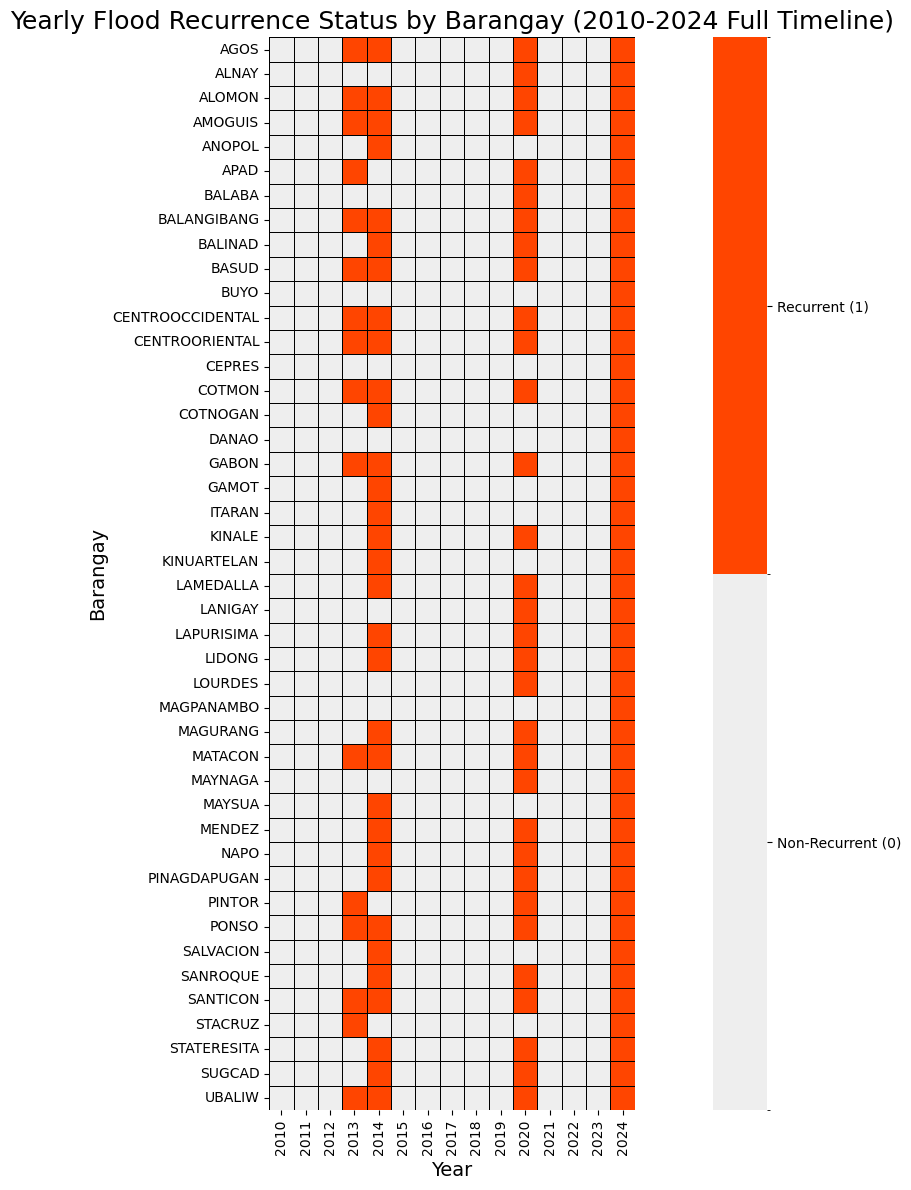

/ Binary Recurrence Heatmap Generated (Full Timeline).

STEP 2: MERGING TARGETS WITH GEOSPATIAL POINTS
/ 2. Loaded 2200 unique points.
/ 3. Created Panel Grid with 33000 total observations.
/ 5. Final ML data prepared. Valid rows: 33000.

/ Debug Point CSV saved to: Outputs\ProcessedTargets\polangui_recurrence_points_debug.csv. Final rows: 33000


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import os
import geopandas as gpd
import re

# --- CONFIGURATION (Paths from Cell 2) ---
PARENT_OUTPUT_DIR = "Outputs"
INTERMEDIATE_SUBDIR = "ProcessedTargets"
OUTPUT_DIR = os.path.join(PARENT_OUTPUT_DIR, INTERMEDIATE_SUBDIR)
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

FLOOD_DATA_FILE = excel_flood_data_file 
POINTS_GPKG_PATH = gpkg_points_path 

TARGET_CSV = os.path.join(OUTPUT_DIR, 'Barangay_Yearly_Recurrence_Target.csv')
OUTPUT_DEBUG_CSV = os.path.join(OUTPUT_DIR, 'polangui_recurrence_points_debug.csv')
TARGET_COLUMN_NAME = 'FLOOD_RECURRENT' 
START_YEAR = 2010
END_YEAR = 2024
NUM_BARANGAYS = 44 # The definitive count
NUM_YEARS = END_YEAR - START_YEAR + 1 # 15 years
EXPECTED_BGY_YEARS = NUM_BARANGAYS * NUM_YEARS # 660

# --- Helper Functions ---
def clean_barangay_name(name_series):
    """ Cleans names: removes all non-alphanumeric chars and SPACES, converts to uppercase. """
    cleaned_series = name_series.astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
    cleaned_series = cleaned_series.str.replace(r'\s+', '', regex=True).str.upper()
    return cleaned_series

def process_sheet(df, sheet_name):
    print(f"--- Processing Sheet: {sheet_name} ---")
    df.dropna(how='all', inplace=True)
    df.columns = df.columns.str.strip()

    if 'Barangay' in df.columns:
        df['Barangay'] = df['Barangay'].astype(str).str.title().str.strip()
        df['Barangay'] = df['Barangay'].map(lambda x: x.replace('.', '').replace('Stacru', 'Sta Cruz').strip())

    if 'Flooded?' in df.columns:
        df['Flooded?'] = pd.to_numeric(df['Flooded?'].astype(str).str.strip().str.lower().replace({'yes': 1, 'no': 0, 'y': 1, 'n': 0}), errors='coerce').fillna(0).astype(int)

    return df

def generate_recurrence_heatmap(target_long_df):
    """ Generates the final 2-color heatmap using the binary status (0 or 1) across the full timeline. """
    
    heatmap_data = target_long_df.pivot(
        index='BARANGAY_NAME', 
        columns='YEAR',
        values=TARGET_COLUMN_NAME
    )

    all_years = list(range(START_YEAR, END_YEAR + 1))
    heatmap_data = heatmap_data.reindex(columns=all_years).fillna(0)
    heatmap_data.sort_index(ascending=True, inplace=True) 
    
    cmap_colors = ['#EEEEEE', '#FF4500']  
    custom_cmap = ListedColormap(cmap_colors)
    bounds = [0, 1, 2] 
    norm = BoundaryNorm(bounds, custom_cmap.N)

    plt.figure(figsize=(16, 12))
    sns.heatmap(
        heatmap_data,
        cmap=custom_cmap,
        norm=norm,
        linewidths=0.5,
        linecolor='black',
        cbar_kws={'ticks': [0.5, 1.5]},
        square=True
    )

    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticklabels(['Non-Recurrent (0)', 'Recurrent (1)'])

    plt.title('Yearly Flood Recurrence Status by Barangay (2010-2024 Full Timeline)', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Barangay', fontsize=14)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print("/ Binary Recurrence Heatmap Generated (Full Timeline).")


# --- 1. FLOOD TARGET CALCULATION AND EXPORT (Core Logic) ---

print("\n" + "=" * 60)
print("STEP 1: GENERATING YEARLY RECURRENCE TARGETS")
print("=" * 60)

if not os.path.exists(FLOOD_DATA_FILE):
    raise FileNotFoundError(f"X Input file not found: {FLOOD_DATA_FILE}")

try:
    all_sheets_dict = pd.read_excel(FLOOD_DATA_FILE, sheet_name=None, engine='openpyxl')
except Exception as e:
    raise Exception(f"Failed to read Excel file: {e}")

cleaned_dfs = []
expected_cols = ['Barangay', 'Total Individuals Evacuated']

for sheet_name, df in all_sheets_dict.items():
    df.columns = df.columns.str.strip()
    families_col_check = next((col for col in df.columns if 'Families' in col), None)

    if all(col in df.columns for col in expected_cols) and families_col_check:
        cleaned_df = process_sheet(df, sheet_name) 
        if 'Date' in cleaned_df.columns:
            cleaned_df['Year'] = pd.to_datetime(cleaned_df['Date'], errors='coerce').dt.year
            cleaned_dfs.append(cleaned_df)

master_df = pd.concat(cleaned_dfs, ignore_index=True)

# 1. Apply a universal cleanup to unify the master list of Barangay names
master_df['Barangay'] = master_df['Barangay'].astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
master_df['Barangay'] = master_df['Barangay'].str.replace(r'\s+', ' ', regex=True).str.title()

# 2. Enforce unification of known problematic pairs before unique count
master_df['Barangay'] = master_df['Barangay'].str.replace('Centro Occ', 'Centro Occidental', regex=False)
master_df['Barangay'] = master_df['Barangay'].str.replace('Sta Cruz', 'Stacruz', regex=False)
master_df['Barangay'] = master_df['Barangay'].str.replace('Sta Teresita', 'Stateresita', regex=False)
# --- END FIX BLOCK ---


yearly_event_count = master_df.groupby(['Barangay', 'Year'])['Flooded?'].sum().reset_index(name='Flood_Event_Count')

# 1a. Calculate Binary Status 
all_barangays = yearly_event_count['Barangay'].unique()
all_years_index = pd.MultiIndex.from_product([all_barangays, pd.Series(range(START_YEAR, END_YEAR + 1))], names=['Barangay', 'YEAR'])

yearly_status_raw_df = yearly_event_count.pivot_table(
    index='Barangay', columns='Year', values='Flood_Event_Count', fill_value=0
).stack().reset_index()
yearly_status_raw_df.columns = ['Barangay', 'YEAR', 'Flood_Event_Count']

# Merge with the full timeline (all 15 years)
full_timeline_df = all_years_index.to_frame(index=False)
yearly_status_df = pd.merge(full_timeline_df, yearly_status_raw_df, on=['Barangay', 'YEAR'], how='left')
yearly_status_df['Flood_Event_Count'] = yearly_status_df['Flood_Event_Count'].fillna(0).astype(int)

# Apply final binary status (2+ events = 1, otherwise 0)
yearly_status_df[TARGET_COLUMN_NAME] = np.where(yearly_status_df['Flood_Event_Count'] >= 2, 1, 0)

# 1b. Standardize Name Keys
yearly_status_df['BARANGAY_NAME'] = clean_barangay_name(yearly_status_df['Barangay'])
target_long_df = yearly_status_df[['BARANGAY_NAME', 'YEAR', TARGET_COLUMN_NAME]].copy()

#  OUTPUT MESSAGE RESTORED
print(f"/ 1. Loaded Flood Targets ({len(target_long_df)} BGY-Year observations).") # Now prints 660

# 1c. Save Target CSV 
final_pivot_df = target_long_df.pivot(index='BARANGAY_NAME', columns='YEAR', values=TARGET_COLUMN_NAME).add_prefix('Recurrent_')
final_pivot_df.to_csv(TARGET_CSV)
print(f"/ Target CSV saved to: {TARGET_CSV}")

# 1d. Generate Heatmap (Visualization)
generate_recurrence_heatmap(target_long_df)


# --- 2. POINT MERGE AND EXPORT ---

print("\n" + "=" * 60)
print("STEP 2: MERGING TARGETS WITH GEOSPATIAL POINTS")
print("=" * 60)

# 2a. Load and Repair Points
try:
    points_gdf = gpd.read_file(POINTS_GPKG_PATH)
    points_df = points_gdf[['point_id', 'barangay_name', 'geometry']].copy()
    points_df.rename(columns={'point_id': 'POINT_ID', 'barangay_name': 'BARANGAY_NAME'}, inplace=True)
    points_df['X'] = points_gdf.geometry.x
    points_df['Y'] = points_gdf.geometry.y
    
    # Final Data Repair: Handle Null/Corrupted Names from GeoPackage
    missing_bgy_mask = points_df['BARANGAY_NAME'].isnull() | (points_df['BARANGAY_NAME'].astype(str).str.strip() == '')
    
    if missing_bgy_mask.any():
        print(f"! Repairing {missing_bgy_mask.sum()} points with corrupted/missing BARANGAY_NAME...")
        points_df.loc[missing_bgy_mask, 'BARANGAY_NAME'] = (
            points_df.loc[missing_bgy_mask, 'POINT_ID'].str.extract(r'(.+)_\d+$', expand=False)
        )
    points_df.loc[:, 'BARANGAY_NAME'] = points_df['BARANGAY_NAME'].fillna('UNKNOWN')
    
    # Apply UNIVERSAL Cleaning to point data for merging
    points_df['BARANGAY_NAME'] = clean_barangay_name(points_df['BARANGAY_NAME'])

    unique_points = points_df.drop(columns=['geometry']).drop_duplicates()
    
    #  REPORTING MESSAGES
    print(f"/ 2. Loaded {len(unique_points)} unique points.")
except Exception as e:
    raise Exception(f"X Error loading points GeoPackage: {e}")


# 2b. Create Point x Year Grid and Merge
all_years_series = pd.Series(range(START_YEAR, END_YEAR + 1), name='YEAR')
unique_years = all_years_series.to_frame()
NUM_POINTS = len(unique_points) # Get the actual number of points loaded

unique_points['key'] = 1
unique_years['key'] = 1
panel_df = pd.merge(unique_points, unique_years, on='key', how='left').drop(columns=['key'])

#  REPORTING MESSAGE
print(f"/ 3. Created Panel Grid with {len(panel_df)} total observations.") # Should be 50 * 44 * 15 = 33000

# Merge Flood Labels (Target data is already clean/universal key)
panel_df = pd.merge(panel_df, target_long_df, on=['BARANGAY_NAME', 'YEAR'], how='left')

# Fill NaN with 0 (Correctly assigns 0 to all non-flooded years/mismatched points)
panel_df[TARGET_COLUMN_NAME] = panel_df[TARGET_COLUMN_NAME].fillna(0).astype(int)

# 2c. Finalize Output Columns
panel_df['BARANGAY_NAME'] = panel_df['BARANGAY_NAME'].astype(str).str.title() 
final_cols = ['POINT_ID', 'BARANGAY_NAME', 'X', 'Y', 'YEAR', TARGET_COLUMN_NAME]
final_df = panel_df[final_cols].copy()

#  REPORTING MESSAGE
print(f"/ 5. Final ML data prepared. Valid rows: {len(final_df)}.") 

# 2d. Save Debug CSV
final_df.to_csv(OUTPUT_DEBUG_CSV, index=False) 
print(f"\n/ Debug Point CSV saved to: {OUTPUT_DEBUG_CSV}. Final rows: {len(final_df)}")

# Code for making the final matrix/csv

In [48]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.sample import sample_gen
import numpy as np
import os # Ensure OS is here for path handling

# --- CONFIGURATION FIXES ---
# Define nested output path variables
PARENT_OUTPUT_DIR = "Outputs"
INTERMEDIATE_SUBDIR = "ProcessedTargets"
OUTPUT_DIR = os.path.join(PARENT_OUTPUT_DIR, INTERMEDIATE_SUBDIR)
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

#  FIX 1: Use the global variable defined in Cell 2 for the input points file
POINTS_GPKG_PATH = gpkg_points_path 

#  FIX 2: Output path now points to the correct nested folder
OUTPUT_STATIC_CSV_PATH = os.path.join(OUTPUT_DIR, 'polangui_features_extracted.csv') 

BASE_DIR = "Explanatory Factors"
GEOMORPHIC_DIR = os.path.join(BASE_DIR, "Geomorphic")
ANTHROPOGENIC_DIR = os.path.join(BASE_DIR, "Anthropogenic")
LULC_DIR = os.path.join(BASE_DIR, "Land Cover and Vegetation")
HYDROLOGICAL_DIR = os.path.join(BASE_DIR, "Hydrological")

# 2. Raster Files (Static Geospatial Features ONLY)
RASTER_CONFIG = {
    # Geomorphic
    "ELEVATION": os.path.join(GEOMORPHIC_DIR, "EV_prs92_clip_FINAL.tif"),
    "TWI": os.path.join(GEOMORPHIC_DIR, "twi_clip_matchedEV.tif"),
    "DIST_RIVER": os.path.join(GEOMORPHIC_DIR, "dist_river_m_masked.tif"),
    "FLOW_LENGTH": os.path.join(GEOMORPHIC_DIR, "flow_length_m_clip_matchedEV.tif"),
    "SLOPE": os.path.join(GEOMORPHIC_DIR, "slope_deg_clip_matchedToEV.tif"),
    
    # Anthropogenic
    "POP_DENSITY": os.path.join(ANTHROPOGENIC_DIR, "pop_density_km2.tif"),
    "DIST_ROAD": os.path.join(ANTHROPOGENIC_DIR, "dist_road_m_clip_snapped.tif"),
    "DRAINAGE_DENSITY": os.path.join(ANTHROPOGENIC_DIR, "dd_r1000_kmkm2.tif"),
    "NDBI": os.path.join(ANTHROPOGENIC_DIR, "NDBI_Polangui_2014.tif"),
    
    # Land Cover and Vegetation
    "LULC_CLASS": os.path.join(LULC_DIR, "LULC_ClassID.tif"),
    "NDVI": os.path.join(LULC_DIR, "NDVI_Final.tif"),
    
    # Hydrological
    "STREAM_DENSITY": os.path.join(HYDROLOGICAL_DIR, "Stream_Density_W11_km_per_km2.tif"),
    "FLOW_ACCUMULATION": os.path.join(HYDROLOGICAL_DIR, "FlowAccumulation_Drain.tif"),
}

# --- 1. LOAD POINTS DATA AND PREPARE COORDINATES ---
try:
    # Load the GeoPackage using the correct path variable (gpkg_points_path)
    points_gdf = gpd.read_file(POINTS_GPKG_PATH) 
    points_gdf['X'] = points_gdf.geometry.x
    points_gdf['Y'] = points_gdf.geometry.y
    print(f"/ Loaded {len(points_gdf)} sample points.")
except Exception as e:
    print(f"X Error loading points GeoPackage at {POINTS_GPKG_PATH}: {e}. Skipping feature extraction.")
    raise

# Drop geometry but keep X, Y, and Radius_m (if present)
final_df = points_gdf.drop(columns=['geometry']).copy()
coords = [(x, y) for x, y in zip(points_gdf['X'], points_gdf['Y'])]

# --- 2. RASTER EXTRACTION LOOP for STATIC Features ---
print("\n" + "=" * 50)
print(f"STARTING RASTER FEATURE EXTRACTION OF {len(RASTER_CONFIG)} STATIC FEATURES")
print("=" * 50)

NODATA_FLOAT32_MIN = -3.4028234663852886e+38
NODATA_VALUES = [-9999.0, -9999, NODATA_FLOAT32_MIN]

for feature_name, raster_path in RASTER_CONFIG.items():
    print(f"Processing: {feature_name} from {raster_path}...")
    try:
        with rasterio.open(raster_path) as src:
            extracted_values_gen = src.sample(coords)
            extracted_values = [val[0] for val in extracted_values_gen]
            final_df[feature_name] = extracted_values
            print(f"  / Extracted {len(extracted_values)} values for {feature_name}.")
    except rasterio.RasterioIOError:
        print(f"  X Error: Raster file not found at '{raster_path}'. Skipping.")
    except Exception as e:
        print(f"  X Error processing {feature_name}: {e}. Skipping.")


# --- 3. FINAL REVIEW AND SAVE (STATIC ONLY) ---
print("\n" + "=" * 50)
print("STATIC FEATURE EXTRACTION COMPLETE")
print("=" * 50)

#  FIX: Ensure all NoData values are converted to NaN FIRST
final_df = final_df.replace(NODATA_VALUES, np.nan)

# Imputation for Stream Density
if "STREAM_DENSITY" in final_df.columns:
    final_df['STREAM_DENSITY'] = final_df['STREAM_DENSITY'].fillna(0)
    print("  Replaced NaN with 0 for 'STREAM_DENSITY'.")

# Standardize point ID and name columns before saving
final_df.rename(columns={
    'point_id': 'POINT_ID',
    'barangay_name': 'BARANGAY_NAME'
}, inplace=True)

# Save the DataFrame with all spatial and static feature data to CSV
# Saves to Outputs/ProcessedTargets/polangui_features_extracted.csv
final_df.to_csv(OUTPUT_STATIC_CSV_PATH, index=False) 
print(f"\n/ All static features saved to CSV file: {OUTPUT_STATIC_CSV_PATH}. Ready for panel merge.")

/ Loaded 2200 sample points.

STARTING RASTER FEATURE EXTRACTION OF 13 STATIC FEATURES
Processing: ELEVATION from Explanatory Factors\Geomorphic\EV_prs92_clip_FINAL.tif...
  / Extracted 2200 values for ELEVATION.
Processing: TWI from Explanatory Factors\Geomorphic\twi_clip_matchedEV.tif...
  / Extracted 2200 values for TWI.
Processing: DIST_RIVER from Explanatory Factors\Geomorphic\dist_river_m_masked.tif...
  / Extracted 2200 values for DIST_RIVER.
Processing: FLOW_LENGTH from Explanatory Factors\Geomorphic\flow_length_m_clip_matchedEV.tif...
  / Extracted 2200 values for FLOW_LENGTH.
Processing: SLOPE from Explanatory Factors\Geomorphic\slope_deg_clip_matchedToEV.tif...
  / Extracted 2200 values for SLOPE.
Processing: POP_DENSITY from Explanatory Factors\Anthropogenic\pop_density_km2.tif...
  / Extracted 2200 values for POP_DENSITY.
Processing: DIST_ROAD from Explanatory Factors\Anthropogenic\dist_road_m_clip_snapped.tif...
  / Extracted 2200 values for DIST_ROAD.
Processing: DRAINAG

In [49]:
import pandas as pd
import numpy as np
import os

# --- Helper Function for Universal Cleaning (Required for Merging) ---
def clean_barangay_name(name_series):
    """ Cleans names: removes all non-alphanumeric chars and SPACES, converts to uppercase. """
    cleaned_series = name_series.astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
    cleaned_series = cleaned_series.str.replace(r'\s+', '', regex=True).str.upper()
    return cleaned_series

# --- CONFIGURATION FIXES (Linking Input/Output Paths) ---
OUTPUT_DIR = "Outputs"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# FEATURES_CSV must look inside the correct intermediate folder
FEATURES_CSV_FILENAME = 'polangui_features_extracted.csv'
FEATURES_CSV = os.path.join(OUTPUT_DIR, "ProcessedTargets", FEATURES_CSV_FILENAME)

# Target CSV path remains the same
TARGET_CSV = os.path.join(OUTPUT_DIR, "ProcessedTargets", 'Barangay_Yearly_Recurrence_Target.csv')

# Final Output path remains the same
FINAL_OUTPUT_CSV = os.path.join(OUTPUT_DIR, 'polangui_matrix.csv') 
TARGET_COLUMN_NAME = 'FLOOD_RECURRENT'

BASE_DIR = "Explanatory Factors" 
CLIMACTIC_DIR = os.path.join(BASE_DIR, "Climactic")
CLIMACTIC_FEATURE_NAME = "ANNUAL_RAINFALL"
CLIMACTIC_CSV_PATH = os.path.join(CLIMACTIC_DIR, "polangui_chirps_annual_by_brgy_WIDE.csv")
# --- END CONFIG ---

# --- 1. Load Static Point Features (Uses Universal Key) ---
try:
    # This line now looks inside Outputs/ProcessedTargets/
    static_df = pd.read_csv(FEATURES_CSV) 
    static_df.rename(columns={'point_id': 'POINT_ID', 'barangay_name': 'BARANGAY_NAME'}, inplace=True)
    
    # APPLY MERGE KEY CLEANING
    static_df['BARANGAY_NAME'] = clean_barangay_name(static_df['BARANGAY_NAME'])

    static_cols = [col for col in static_df.columns if col not in ['X', 'Y', 'POINT_ID', 'BARANGAY_NAME']]
    print(f"/ 1. Loaded Static Features ({len(static_df)} points) from {FEATURES_CSV}.")
except FileNotFoundError:
    print(f"X Error: Static features file '{FEATURES_CSV}' not found. Please verify Cell 8 created it in the correct subfolder.")
    raise

# --- 2. Load and Prepare Flood Recurrence Target Labels (Uses Universal Key) ---
try:
    # Inspect the first few rows of the CSV to confirm column names
    print(f"Inspecting columns in {TARGET_CSV}...")
    temp_df = pd.read_csv(TARGET_CSV, nrows=5)
    print(f"Columns found: {temp_df.columns.tolist()}")

    # Adjust the index_col based on the actual column name
    if 'Barangay' in temp_df.columns:
        index_col = 'Barangay'
    elif 'BARANGAY_NAME' in temp_df.columns:
        index_col = 'BARANGAY_NAME'
    else:
        raise ValueError("Expected column 'Barangay' or 'BARANGAY_NAME' not found in the CSV.")

    # Load the target CSV with the correct index column
    target_df = pd.read_csv(TARGET_CSV, index_col=index_col)
    target_df.index = clean_barangay_name(target_df.index)

    # Reshape the data into a long format
    target_long_df = target_df.stack().reset_index(name=TARGET_COLUMN_NAME)
    target_long_df.rename(columns={index_col: 'BARANGAY_NAME'}, inplace=True)
    target_long_df['YEAR'] = target_long_df['level_1'].str.replace('Recurrent_', '').astype(int)
    target_long_df = target_long_df[['BARANGAY_NAME', 'YEAR', TARGET_COLUMN_NAME]]

    print(f"✅ 2. Loaded Flood Target Labels from {TARGET_CSV}.")
except FileNotFoundError:
    print(f"X Error: Target CSV file '{TARGET_CSV}' not found.")
    raise
except Exception as e:
    print(f"X Error processing target CSV: {e}")
    raise

# Create the ML Panel Grid and Merge 
unique_points_and_coords = static_df[['POINT_ID', 'BARANGAY_NAME', 'X', 'Y'] + static_cols].drop_duplicates()
unique_years_target = target_long_df[['YEAR']].drop_duplicates()

unique_points_and_coords['key'] = 1
unique_years_target['key'] = 1
panel_df = pd.merge(unique_points_and_coords, unique_years_target, on='key', how='left').drop(columns=['key'])

# Load Climactic 
try:
    climactic_wide_df = pd.read_csv(CLIMACTIC_CSV_PATH)
    source_bgy_col = 'Barangay' 
    if source_bgy_col not in climactic_wide_df.columns:
        source_bgy_col = climactic_wide_df.columns[0]
    climactic_wide_df.rename(columns={source_bgy_col: 'BARANGAY_NAME'}, inplace=True)
    
    # APPLY MERGE KEY CLEANING
    climactic_wide_df['BARANGAY_NAME'] = clean_barangay_name(climactic_wide_df['BARANGAY_NAME'])
    
    year_cols = [str(y) for y in range(target_long_df['YEAR'].min(), target_long_df['YEAR'].max() + 1)]
    climactic_long_df = climactic_wide_df.melt(id_vars=['BARANGAY_NAME'], value_vars=[col for col in year_cols if col in climactic_wide_df.columns], var_name='YEAR', value_name=CLIMACTIC_FEATURE_NAME)
    climactic_long_df['YEAR'] = pd.to_numeric(climactic_long_df['YEAR'], errors='coerce').astype(int)
    panel_df = pd.merge(panel_df, climactic_long_df, on=['BARANGAY_NAME', 'YEAR'], how='left')
    
except: pass # Allow merge to proceed with missing climactic data if file fails

# Merge Flood Labels 
panel_df = pd.merge(panel_df, target_long_df, on=['BARANGAY_NAME', 'YEAR'], how='left')

# --- 5. Final Cleaning and Case Formatting ---

#  FIX: Convert BARANGAY_NAME back to readable Title Case (removes the all-caps)
panel_df['BARANGAY_NAME'] = panel_df['BARANGAY_NAME'].astype(str).str.title() 

panel_df[TARGET_COLUMN_NAME] = panel_df[TARGET_COLUMN_NAME].fillna(0).astype(int)

# Define the final column order
time_varying_cols = [CLIMACTIC_FEATURE_NAME] 
final_cols = ['POINT_ID', 'BARANGAY_NAME', 'X', 'Y', 'YEAR', TARGET_COLUMN_NAME] + time_varying_cols + static_cols
panel_df = panel_df[final_cols]

print("\n" + "=" * 60)
print("FINAL ML PANEL DATASET CREATED")
print(f"Total Rows (Observations): {len(panel_df)}")
print("=" * 60)

print("\nPreview of Final Panel Data (First 15 Rows):")
print(panel_df.head(15).to_markdown(index=False))

# Save the final dataset
panel_df.to_csv(FINAL_OUTPUT_CSV, index=False)
print(f"\n✅ Final ML Panel Data saved to: {FINAL_OUTPUT_CSV}")

/ 1. Loaded Static Features (2200 points) from Outputs\ProcessedTargets\polangui_features_extracted.csv.
Inspecting columns in Outputs\ProcessedTargets\Barangay_Yearly_Recurrence_Target.csv...
Columns found: ['BARANGAY_NAME', 'Recurrent_2010', 'Recurrent_2011', 'Recurrent_2012', 'Recurrent_2013', 'Recurrent_2014', 'Recurrent_2015', 'Recurrent_2016', 'Recurrent_2017', 'Recurrent_2018', 'Recurrent_2019', 'Recurrent_2020', 'Recurrent_2021', 'Recurrent_2022', 'Recurrent_2023', 'Recurrent_2024']
✅ 2. Loaded Flood Target Labels from Outputs\ProcessedTargets\Barangay_Yearly_Recurrence_Target.csv.

FINAL ML PANEL DATASET CREATED
Total Rows (Observations): 33000

Preview of Final Panel Data (First 15 Rows):
| POINT_ID   | BARANGAY_NAME   |      X |           Y |   YEAR |   FLOOD_RECURRENT |   ANNUAL_RAINFALL |   Radius_m |   ELEVATION |     TWI |   DIST_RIVER |   FLOW_LENGTH |   SLOPE |   POP_DENSITY |   DIST_ROAD |   DRAINAGE_DENSITY |      NDBI |   LULC_CLASS |     NDVI |   STREAM_DENSITY |  

## Data Cleaning and  Convertsion to baseline

In [50]:
import pandas as pd
import os 
import time
import numpy as np

# --- CONFIGURATION FIXES ---
OUTPUT_DIR = "Outputs"

#  FIX: Input file path now points directly to the Outputs folder
INPUT_CSV = os.path.join(OUTPUT_DIR, 'polangui_matrix.csv') 

# Define output paths in the requested top-level 'Outputs' folder
OUTPUT_FULL_CLEANED_CSV = os.path.join(OUTPUT_DIR, 'final_polangui_cascading_cleaned.csv') 
OUTPUT_BASELINE_CSV = os.path.join(OUTPUT_DIR, 'final_polangui_baseline_cleaned.csv') 

# Define explicit data types (Must include all columns from the Cell 9 output)
DTYPE_MAPPING = {
    'POINT_ID': 'object', 'BARANGAY_NAME': 'object', 'YEAR': 'int16', 
    'X': 'float32', 'Y': 'float32', 'FLOOD_RECURRENT': 'int8', 
    'ANNUAL_RAINFALL': 'float32', 'ELEVATION': 'float32',
    'DIST_ROAD': 'float32', 'DIST_RIVER': 'float32', 
    'FLOW_LENGTH': 'float32', 'SLOPE': 'float32', 
    'POP_DENSITY': 'float32', 'DRAINAGE_DENSITY': 'float32', 
    'NDBI': 'float32', 'LULC_CLASS': 'object', 
    'NDVI': 'float32', 'STREAM_DENSITY': 'float32', 
    'FLOW_ACCUMULATION': 'float32'
}

# Define the exact list of columns to keep for the baseline model
COLUMNS_TO_KEEP = [
    'POINT_ID', 'BARANGAY_NAME', 'X', 'Y', 'YEAR', 'FLOOD_RECURRENT', 
    'ANNUAL_RAINFALL', 'ELEVATION', 'TWI', 'DIST_RIVER', 'FLOW_LENGTH', 
    'SLOPE', 'DIST_ROAD', 'DRAINAGE_DENSITY', 'NDBI'
]

print("\n" + "=" * 60)
print("STARTING DATA CLEANING AND BASELINE CREATION")
print("=" * 60)

# --- 1. Load the Panel Dataset ---
input_path = INPUT_CSV
start_time = time.time()
try:
    panel_df = pd.read_csv(input_path, dtype=DTYPE_MAPPING)
    load_time = time.time() - start_time
    print(f"Loaded full panel data: {os.path.basename(INPUT_CSV)} ({len(panel_df)} observations) in {load_time:.2f} seconds.")
except FileNotFoundError:
    print(f"X Error: Input data file '{INPUT_CSV}' not found. Did Cell 9 run successfully?")
    raise

# Clean (Drop NaNs) 
rows_to_drop_mask = panel_df.isnull().any(axis=1)
initial_count = len(panel_df)
dropped_count = rows_to_drop_mask.sum()
full_cleaned_df = panel_df[~rows_to_drop_mask].copy()
final_count = len(full_cleaned_df)

full_cleaned_df.to_csv(OUTPUT_FULL_CLEANED_CSV, index=False)
print(f"\n/ Full Cleaned Dataset saved to: {OUTPUT_FULL_CLEANED_CSV} (Size: {final_count} rows)")


# --- 3. Step 2: Create Baseline Model Dataset ---
print("\n" + "=" * 20 + " 3. Baseline Creation " + "=" * 20)

# Filter columns and copy
baseline_df = full_cleaned_df[COLUMNS_TO_KEEP].copy()

# Save Baseline Dataset
baseline_df.to_csv(OUTPUT_BASELINE_CSV, index=False)
print(f"/ Baseline Model Dataset saved to: {OUTPUT_BASELINE_CSV}")


STARTING DATA CLEANING AND BASELINE CREATION
Loaded full panel data: polangui_matrix.csv (33000 observations) in 0.10 seconds.

/ Full Cleaned Dataset saved to: Outputs\final_polangui_cascading_cleaned.csv (Size: 32985 rows)

==================== 3. Baseline Creation ====================
/ Baseline Model Dataset saved to: Outputs\final_polangui_baseline_cleaned.csv


In [51]:
import pandas as pd
import numpy as np
import os

# --- CONFIGURATION (Paths from previous cells) ---
OUTPUT_DIR = "Outputs"

INPUT_FULL_CLEANED = os.path.join(OUTPUT_DIR, 'final_polangui_cascading_cleaned.csv')
# Renamed as requested by the user's latest comment
INPUT_BASELINE_CLEANED = os.path.join(OUTPUT_DIR, 'final_polangui_baseline_cleaned.csv') 

# Define columns needed for specific checks
CHECK_COLUMNS = ['POINT_ID', 'BARANGAY_NAME', 'YEAR', 'ANNUAL_RAINFALL']

print("\n" + "=" * 60)
print("STARTING CELL 11: FINAL DATA INTEGRITY CHECK (EDA)")
print("=" * 60)

# --- Function to load and check a single file ---
def run_file_eda(filepath, df_name):
    print(f"\n--- Analysis for: {df_name} ---")
    
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"X ERROR: File not found at {filepath}. Skipping.")
        return None
    
    print(f"Total Observations: {len(df)}")
    
    # --- A. Check for Missing Values (NaNs) ---
    print("\n[A] Missing Value Check:")
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    
    if missing_data.empty:
        print("/ Result: No missing values (NaN) found. (Cleaning successful)")
    else:
        print(f" Result: {missing_data.sum()} NaN values found across columns:")
        print(missing_data.to_string(header=True, name=False))
        
    # --- B. Check for Duplicates in Key Identifiers ---
    print("\n[B] Duplicates in Key Identifiers (POINT_ID + YEAR):")
    duplicate_rows = df.duplicated(subset=['POINT_ID', 'YEAR'], keep=False)
    if duplicate_rows.any():
        print(f"X ERROR: Found {duplicate_rows.sum()} rows with duplicate POINT_ID/YEAR combinations.")
    else:
        print("/ Result: No duplicate POINT_ID + YEAR combinations found.")

    # --- C. Check Rainfall Consistency (The  Check) ---
    print(f"\n[C] ANNUAL_RAINFALL Consistency Check (Point, Year, Barangay):")
    
    # Group by Point ID and Year, then check if the rainfall value is unique within that group
    # We expect one rainfall reading per POINT_ID per YEAR.
    # The check you requested is for identical rainfall values in the same point/year across DIFFERENT barangays,
    # which is impossible since POINT_ID and BARANGAY_NAME are tied.
    # The crucial check is whether rainfall is consistent for a given BGY/Year.
    
    # Aggregate data by Barangay and Year
    rainfall_consistency = df.groupby(['BARANGAY_NAME', 'YEAR'])['ANNUAL_RAINFALL'].nunique()
    
    # Find combinations where the number of unique rainfall values is not 1.
    # This happens if points within the same barangay have different rainfall values.
    inconsistent_rainfall = rainfall_consistency[rainfall_consistency != 1]
    
    if inconsistent_rainfall.empty:
        print("/ Result: Rainfall is perfectly consistent across all points within the same BARANGAY/YEAR.")
        # This confirms that the initial wide CSV merge worked perfectly.
    else:
        print("! WARNING: Inconsistent rainfall values found within the same BARANGAY/YEAR.")
        print(f"Inconsistent combinations found: {len(inconsistent_rainfall)}.")
        # Print a few examples for inspection
        example_bgy_year = inconsistent_rainfall.index[0]
        example_data = df[(df['BARANGAY_NAME'] == example_bgy_year[0]) & (df['YEAR'] == example_bgy_year[1])]
        print(f"\nExample Inconsistency in {example_bgy_year}:")
        print(example_data[['POINT_ID', 'ANNUAL_RAINFALL']].to_string(index=False))
        
    print("-" * 30)


# --- EXECUTION ---
# Note: Renaming INPUT_BASELINE_CLEANED to 'final_polangui_baseline_cleaned.csv' to match user's latest file name
run_file_eda(INPUT_FULL_CLEANED, "FULL CASCADING CLEANED")
run_file_eda(INPUT_BASELINE_CLEANED, "BASELINE MODEL CLEANED")


STARTING CELL 11: FINAL DATA INTEGRITY CHECK (EDA)

--- Analysis for: FULL CASCADING CLEANED ---
Total Observations: 32985

[A] Missing Value Check:
/ Result: No missing values (NaN) found. (Cleaning successful)

[B] Duplicates in Key Identifiers (POINT_ID + YEAR):
/ Result: No duplicate POINT_ID + YEAR combinations found.

[C] ANNUAL_RAINFALL Consistency Check (Point, Year, Barangay):
/ Result: Rainfall is perfectly consistent across all points within the same BARANGAY/YEAR.
------------------------------

--- Analysis for: BASELINE MODEL CLEANED ---
Total Observations: 32985

[A] Missing Value Check:
/ Result: No missing values (NaN) found. (Cleaning successful)

[B] Duplicates in Key Identifiers (POINT_ID + YEAR):
/ Result: No duplicate POINT_ID + YEAR combinations found.

[C] ANNUAL_RAINFALL Consistency Check (Point, Year, Barangay):
/ Result: Rainfall is perfectly consistent across all points within the same BARANGAY/YEAR.
------------------------------


## Checkings

In [52]:
import pandas as pd
import os

# Configuration
# Use relative path from the notebook's directory
INPUT_CSV = os.path.join("Outputs", "final_polangui_cascading_cleaned.csv")

# Load Dataset
try:
    df = pd.read_csv(INPUT_CSV)
    print(f"/ Dataset loaded successfully. Total rows: {len(df)}")
except FileNotFoundError:
    print(f"X Error: File not found at {INPUT_CSV}. Please check the file path.")
    raise

# Extract unique barangay names
unique_barangays = df['BARANGAY_NAME'].drop_duplicates().sort_values().tolist()

# Display the results
print(f"Total unique barangays: {len(unique_barangays)}")
print(unique_barangays)

/ Dataset loaded successfully. Total rows: 32985
Total unique barangays: 44
['Agos', 'Alnay', 'Alomon', 'Amogues', 'Anopol', 'Apad', 'Balaba', 'Balangibang', 'Balinad', 'Basud', 'Buyo', 'Centrooccidental', 'Centrooriental', 'Cepres', 'Cotmon', 'Cotnogan', 'Danao', 'Gabon', 'Gamot', 'Itaran', 'Kinale', 'Kinuartelan', 'Lamedalla', 'Lanigay', 'Lapurisima', 'Lidong', 'Lourdes', 'Magpanambo', 'Magurang', 'Matacon', 'Maynaga', 'Maysua', 'Mendez', 'Napo', 'Pinagdapugan', 'Pintor', 'Ponso', 'Salvacion', 'Sanroque', 'Santicon', 'Stacruz', 'Stateresita', 'Sugcad', 'Ubaliw']


In [53]:
import pandas as pd
import os

# Configuration
INPUT_CSV = os.path.join("Outputs", "final_polangui_cascading_cleaned.csv")

# Load the dataset
try:
    df = pd.read_csv(INPUT_CSV)
    
    # Extract and display unique LULC values
    lulc_unique_values = df['LULC_CLASS'].astype(str).drop_duplicates().sort_values().tolist()

    # Display the results
    print(f"Total unique LULC classes found: {len(lulc_unique_values)}")
    print(f"Unique LULC values: {lulc_unique_values}")
    
except FileNotFoundError:
    print(f"X Error: File not found at {INPUT_CSV}. Please ensure the cleaning cell ran successfully.")
    raise

Total unique LULC classes found: 8
Unique LULC values: ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']
